Agora vamos fazer a mineração de um texto e extrair palavras chaves:

In [60]:
url='https://link.springer.com/article/10.1007/s43681-023-00280-x'
url2='https://link.springer.com/article/10.1007/s43681-023-00279-4'
url3='https://link.springer.com/article/10.1007/s43681-023-00276-7'
url4='https://link.springer.com/article/10.1007/s43681-023-00272-x'

Importamos algumas bibliotecas

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [62]:
text = requests.get(url).content.decode('utf-8')
#print(text[:1000])

Convertemos a linguagem de marcação html em um texto simples usando o objeto HTMLParser. 

In [63]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res

start_index = text.index("Abstract")
end_index = text.index("References")
text = text[(start_index+8):end_index]
#print(text[:1000])

Vamos extrair os insights, ou seja as palavras-chave mais significativas usando a biblioteca RAKE. 

In [64]:
import sys
!{sys.executable} -m pip install nlp_rake

Defaulting to user installation because normal site-packages is not writeable


Definiremos o comprimento mínimo de uma palavra-chave para 5 caracteres, a frequência mínima de uma palavra-chave no documento para 3 e o número máximo de palavras em uma palavra-chave para 2.

In [65]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('social environment', 4.0),
 ('social objectives', 4.0),
 ('social dynamics', 4.0),
 ('consequential decision-making', 4.0),
 ('social sciences', 4.0),
 ('fair ml', 4.0),
 ('predictive performance', 4.0),
 ('training data', 4.0),
 ('academic performance', 4.0),
 ('latent variable', 4.0),
 ('ml models', 3.9375),
 ('statistical properties', 3.928571428571429),
 ('target system', 3.928571428571429),
 ('target variable', 3.928571428571429),
 ('observable properties', 3.928571428571429),
 ('ml developers', 3.857142857142857),
 ('probability score', 3.833333333333333),
 ('social environments', 3.8),
 ('adequacy-for-purpose view', 3.7857142857142856),
 ('moral evaluation', 3.736842105263158),
 ('ml model', 3.7272727272727275),
 ('input variables', 3.7272727272727275),
 ('disadvantaged groups', 3.7272727272727275),
 ('college admission', 3.716666666666667),
 ('substantive fairness', 3.7142857142857144),
 ('fairness concerns', 3.7142857142857144),
 ('decision-making process', 3.66666666666666

In [66]:
!{sys.executable} -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


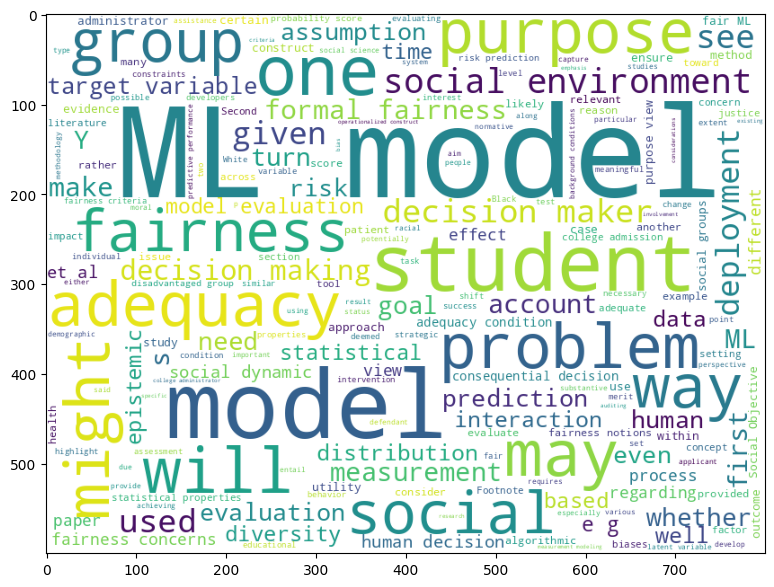

In [67]:


wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))